<a href="https://colab.research.google.com/github/IronVr/Machine_learning_technologies/blob/classification/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Загрузка данных

https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset?resource=download


In [ ]:
# используем Pandas read_csv():

dataset = pd.read_csv("mushroom_cleaned.csv")

# Анализ данных

In [ ]:
# размер датасета, 150 записей, 5 столбцов

dataset.shape

(54035, 9)

In [ ]:
# отображаем первые 10 сстрок датасета

dataset.head(10)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [ ]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

dataset.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [ ]:
dataset['class'].unique()

array([1, 0])

In [ ]:
# Теперь проверим количество строк, которое принадлежит каждому классу:

dataset['class'].value_counts()

,count
class,
1,29675
0,24360


Всего классов 2.

0 - гриб съедобен, 1 - ядовит

# Визуализация данных

In [ ]:
# Временно заменим на категориальные данные
dataset['class'] = dataset['class'].replace({0: 'Eatable', 1: 'Poisonous'})

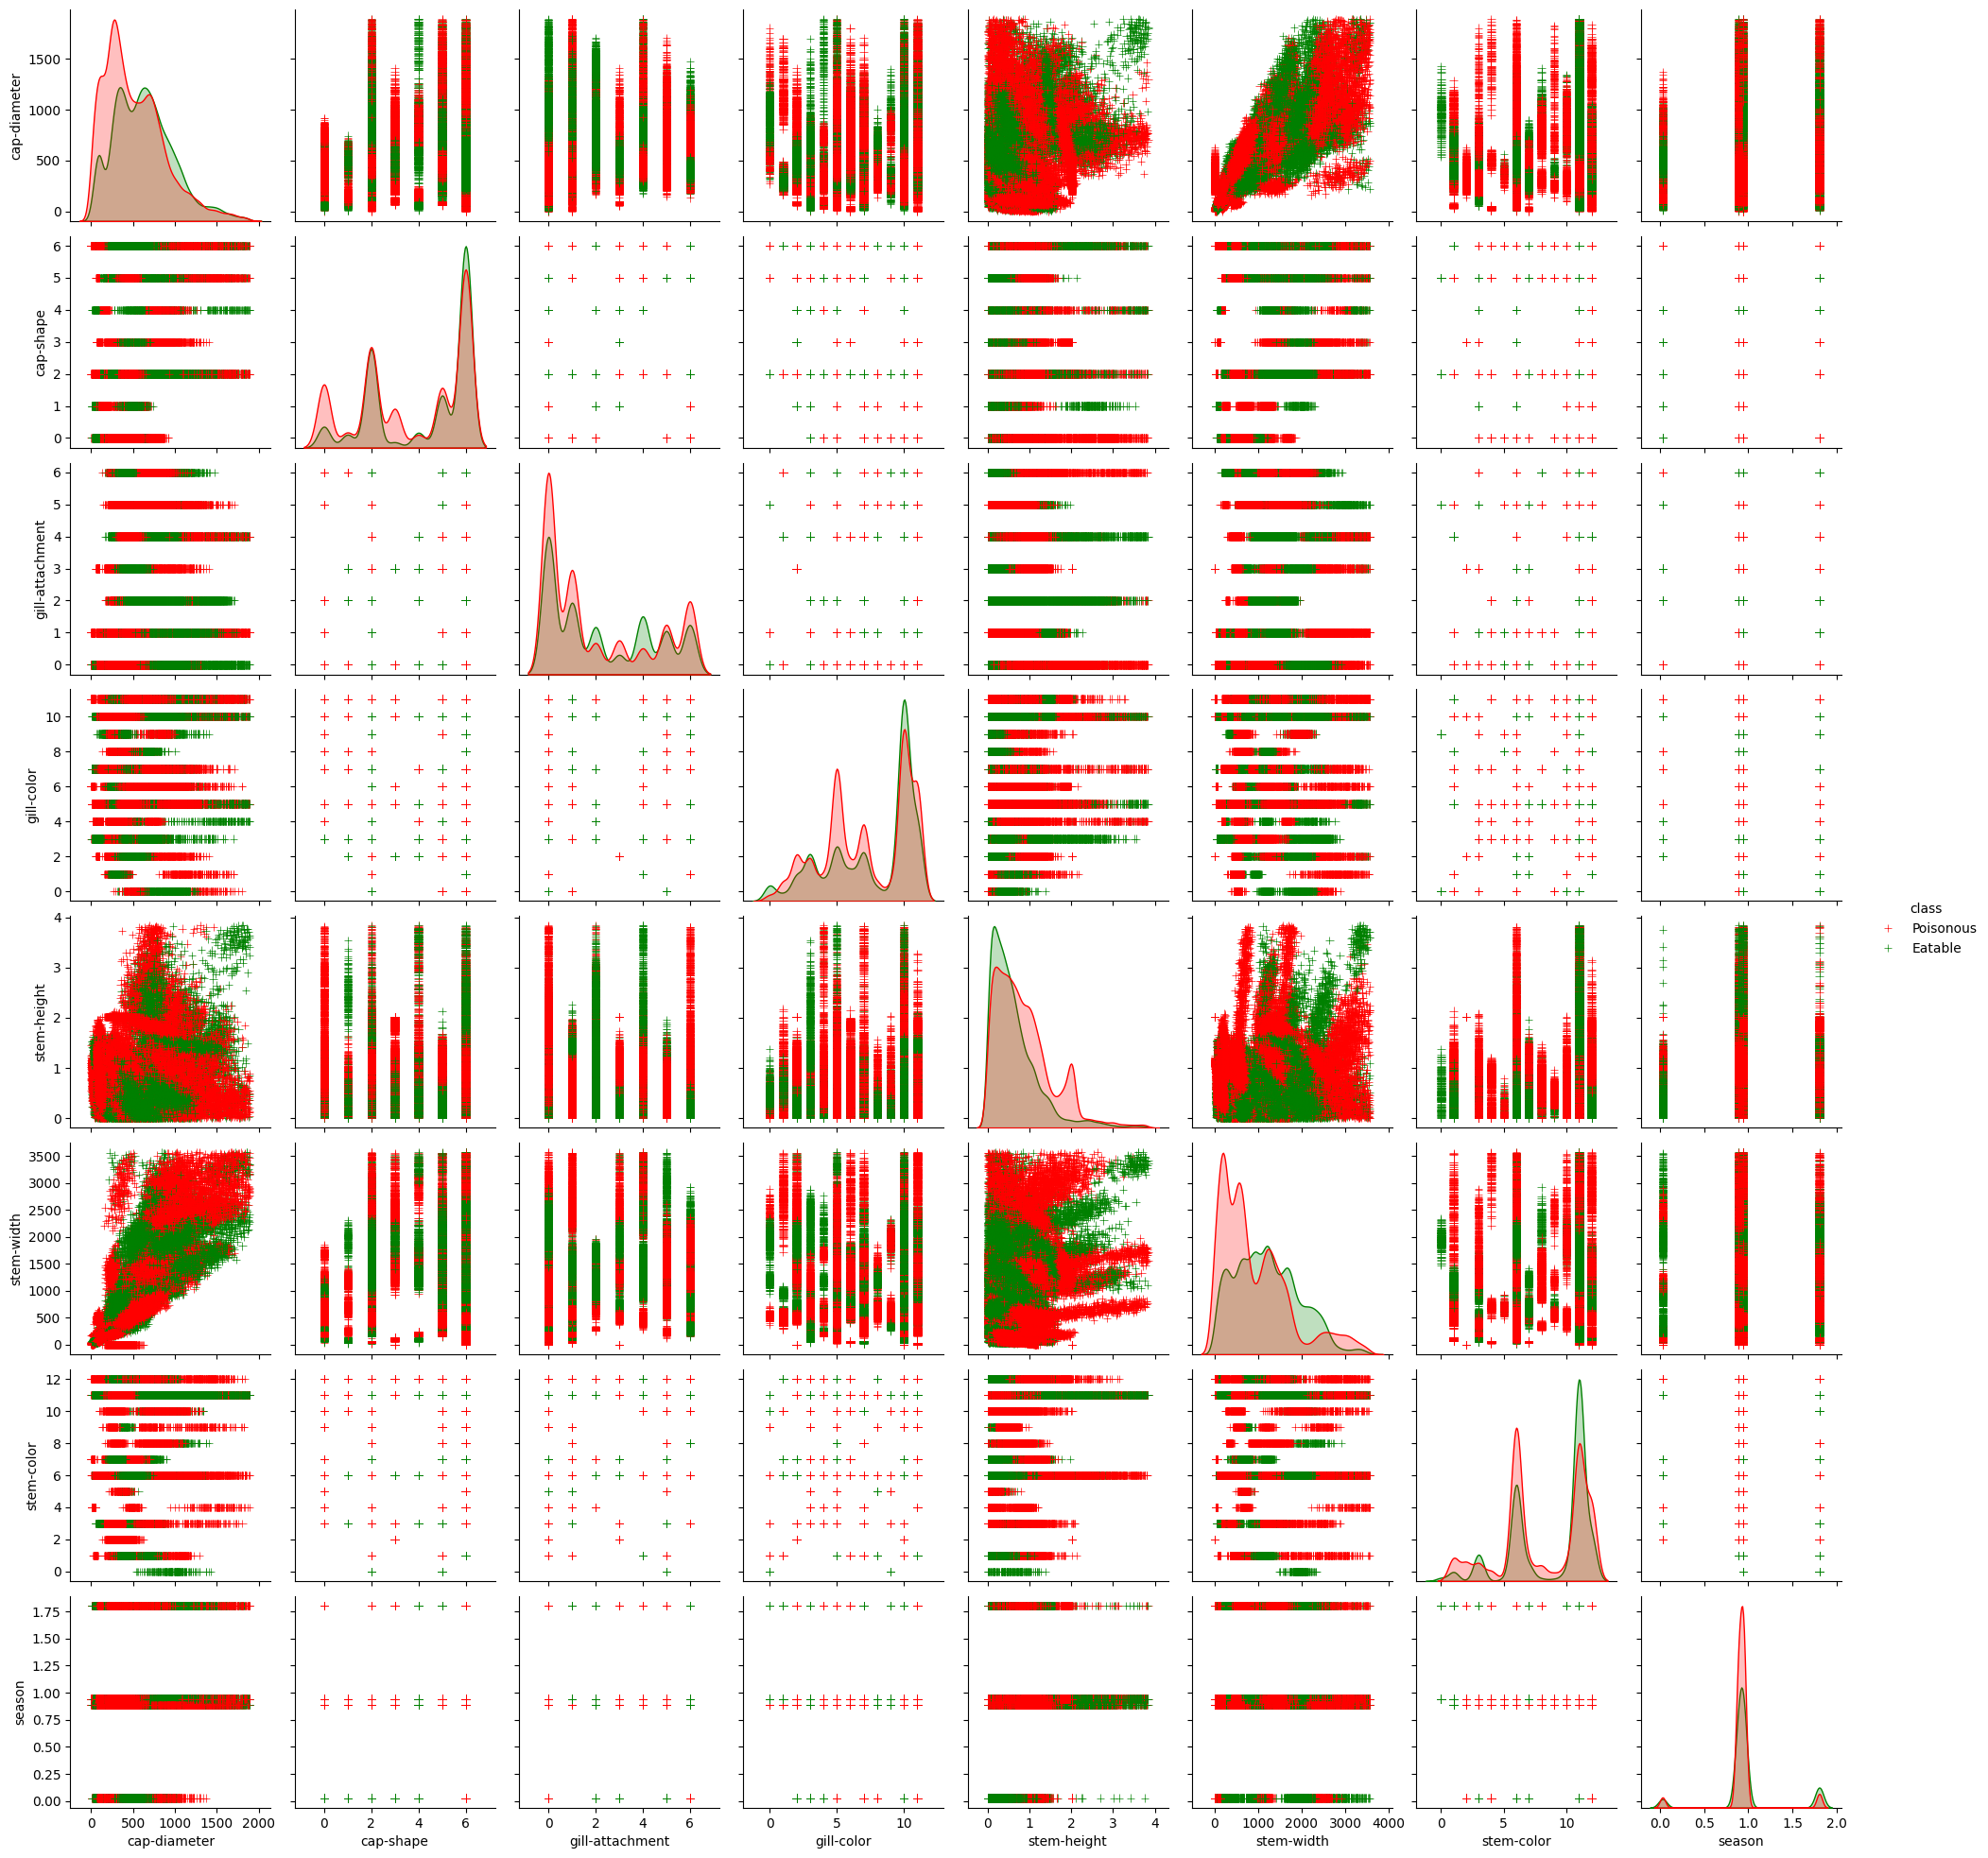

In [ ]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(dataset, hue='class', markers='+',palette ={'Poisonous': 'red', 'Eatable': 'green'})
plt.show()

Видим, что Iris-Setosa отличается от обоих других видов по всем признакам.

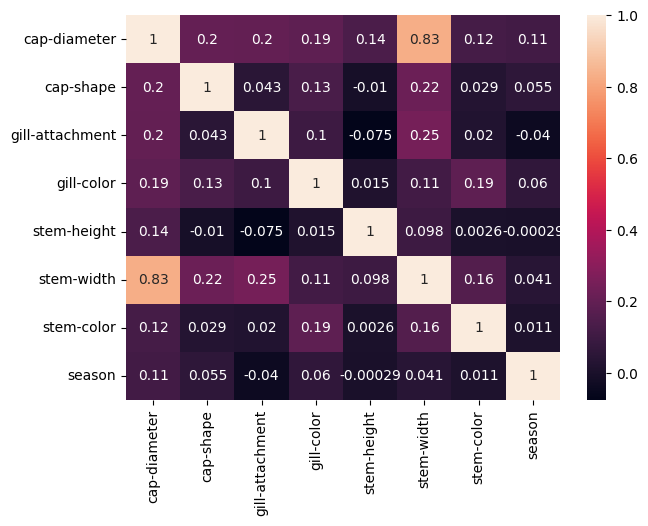

In [ ]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

Очень подробное и понятное описание возможностей построения графиков с помощью Matplotlib и Pandas с примерами кода можно найти здесь:

https://colab.research.google.com/drive/1ggUqm3C-Jk3dcMeibMW88FZLu7vtJ2k8?usp=sharing


# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец class.

В X складываем весь набор данных без целевой переменной.


In [ ]:
X = dataset.drop(['class'], axis=1)
y = dataset['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (54035, 8) | y shape: (54035,) 


X имеет 150 строк и 4 столбца, тогда как Y имеет 150 строк и только один столбец.


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
import scipy.stats as stats

y_mapped = y.map({'Eatable': 0, 'Poisonous': 1})

# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.30, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=16.393268844917195, pvalue=2.988131394449145e-60, df=54033.0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.0, pvalue=1.0, df=54033.0)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB) </br>


In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.635722 (0.004625)
LDA: 0.637943 (0.006027)
KNN: 0.715092 (0.006531)
CART: 0.975918 (0.002291)
NB: 0.638035 (0.006478)


Classification and Regression Trees  классификатор показал лучшие метрики среди всех алгоритмов.
Далее работаем с Classification and Regression Trees .

Давайте обучим модель CART на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Определяем нашу модель CART
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4872
           1       0.98      0.98      0.98      5935

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807



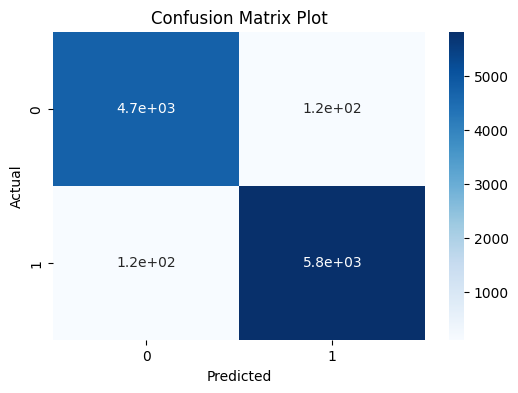

In [ ]:
# Создание модели CART
cart_model = DecisionTreeClassifier(random_state=42)
# Обучение модели
cart_model.fit(X_train, y_train)
# Прогнозирование на тестовой выборке
y_pred = cart_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# Вывод метрик
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Plot")
plt.show()

## Визуализация решения

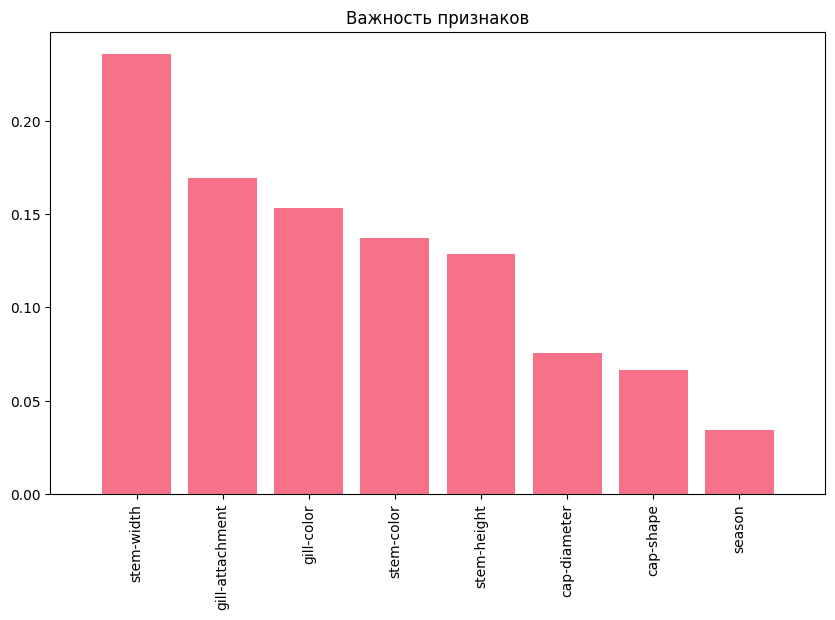

In [ ]:

importances = cart_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Важность признаков')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), dataset.columns[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

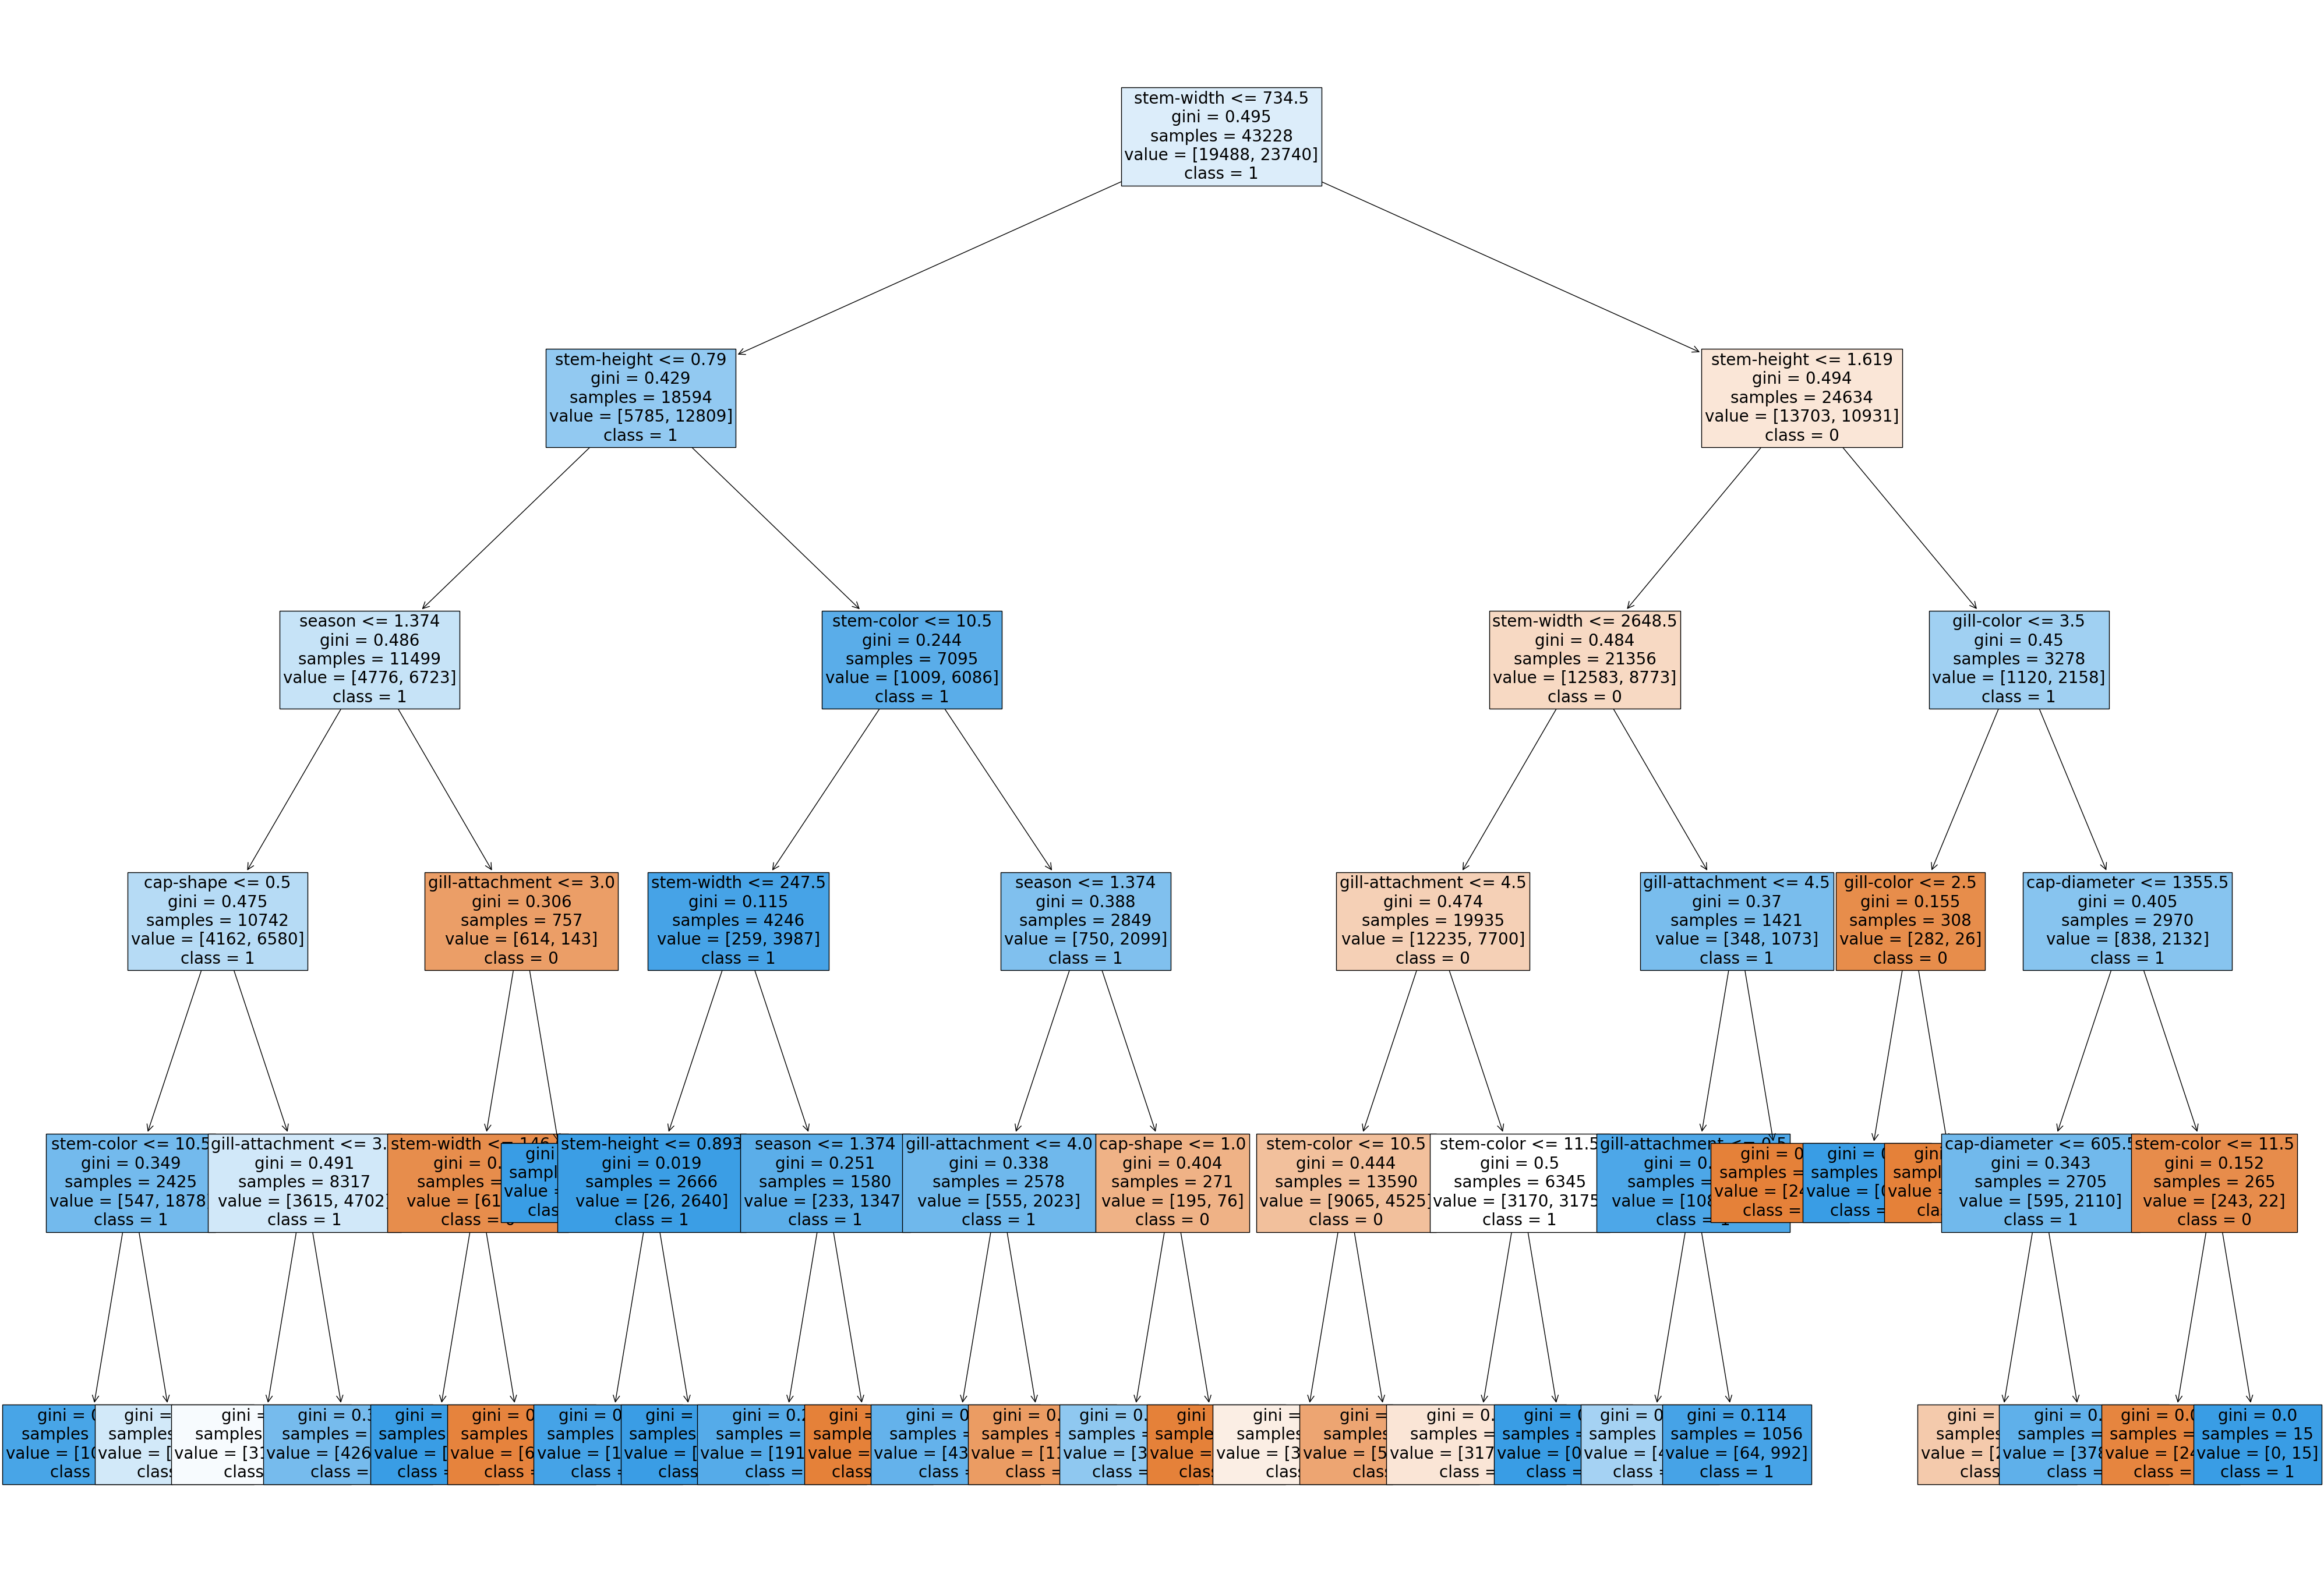

In [ ]:
from sklearn.tree import plot_tree

'''Для более читаемого вывода, создаем новую модель и фиксируем глубину дерева'''
# Создание модели CART
cart_model1 = DecisionTreeClassifier(random_state=42, max_depth=5)
# Обучение модели
cart_model1.fit(X_train, y_train)
# Прогнозирование на тестовой выборке
y_pred = cart_model1.predict(X_test)
# визуализация в виде дерева
plt.figure(figsize=(50, 35))
plot_tree(cart_model1, filled=True, feature_names=dataset.columns[:-1], class_names=["0", "1"],fontsize = 20)
plt.show()
